In [6]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np

In [7]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
test = pd.read_csv('data/house-prices/test.csv', index_col=['Id'])

In [8]:
print('train:', train.shape)
print('test:', test.shape)

train: (1460, 80)
test: (1459, 79)


In [5]:
print('missing column:', set(train.columns) - set(test.columns))

missing column: {'SalePrice'}


In [6]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

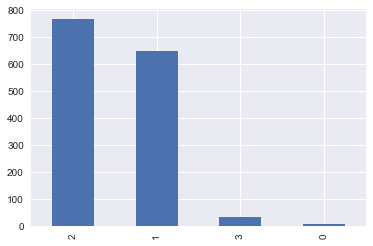

In [8]:
train.FullBath.value_counts().plot(kind='bar')

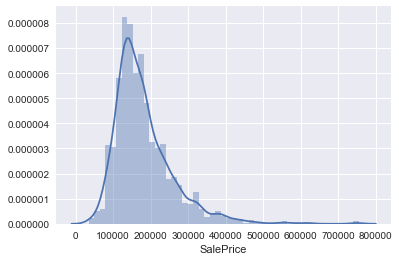

In [9]:
sns.distplot(train.SalePrice)

In [10]:
from sklearn.model_selection import train_test_split

train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(train_no_sale_price,
                                                    train_sale_price,
                                                    test_size=0.3,
                                                    random_state=4330)

In [11]:
for df in [X_train, X_test, y_train, y_test]:
  print(df.shape)

(1022, 79)
(438, 79)
(1022,)
(438,)


In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# regressor.fit(X_train, y_train)

In [13]:
print((X_train.values == 'Abnorml').sum())
col_idx = pd.np.argmax(X_train.values == 'Abnorml', axis=1).max()
X_train.iloc[:, col_idx].value_counts()

76


Normal     825
Partial     96
Abnorml     76
Family      16
Alloca       7
AdjLand      2
Name: SaleCondition, dtype: int64

In [14]:
X_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1022.000000   851.000000    1022.000000  1022.000000  1022.000000   
mean     58.414873    70.177438   10735.380626     6.073386     5.545988   
std      44.416250    26.131482   11344.844137     1.373991     1.096401   
min      20.000000    21.000000    1300.000000     2.000000     2.000000   
25%      20.000000    58.000000    7564.250000     5.000000     5.000000   
50%      50.000000    70.000000    9544.500000     6.000000     5.000000   
75%      70.000000    80.000000   11616.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1022.000000   1022.000000  1018.000000  1022.000000  1022.000000   
mean   1971.486301   1984.690802   105.416503   443.613503    45.534247   
std      30.262989     20.737629   181.973221   464.425961   155.139109   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.500000   1993.500000     0.000000   380.500000     0.000000   
75%    2001.000000   2004.000000   168.750000   719.750000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

          ...        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count     ...       1022.000000  1022.000000  1022.000000    1022.000000   
mean      ...        478.014677    91.718200    48.040117      21.546967   
std       ...        212.612947   125.674902    68.896801      58.997097   
min       ...          0.000000     0.000000     0.000000       0.000000   
25%       ...        338.000000     0.000000     0.000000       0.000000   
50%       ...        480.000000     0.000000    26.000000       0.000000   
75%       ...        576.000000   168.000000    70.000000       0.000000   
max       ...       1418.000000   857.000000   547.000000     318.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal       MoSold  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      3.934442    14.780822     3.440313    39.080235     6.277886   
std      32.831010    55.423160    45.265717   335.892594     2.731375   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       0.000000     0.000000     0.000000     0.000000     4.000000   
50%       0.000000     0.000000     0.000000     0.000000     6.000000   
75%       0.000000     0.000000     0.000000     0.000000     8.000000   
max     508.000000   480.000000   738.000000  8300.000000    12.000000   

            YrSold  
count  1022.000000  
mean   2007.829746  
std       1.333798  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  

[8 rows x 36 columns]

In [15]:
pd.options.display.max_columns = 36
pd.options.display.max_rows = 10
X_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1022.000000   851.000000    1022.000000  1022.000000  1022.000000   
mean     58.414873    70.177438   10735.380626     6.073386     5.545988   
std      44.416250    26.131482   11344.844137     1.373991     1.096401   
min      20.000000    21.000000    1300.000000     2.000000     2.000000   
25%      20.000000    58.000000    7564.250000     5.000000     5.000000   
50%      50.000000    70.000000    9544.500000     6.000000     5.000000   
75%      70.000000    80.000000   11616.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1022.000000   1022.000000  1018.000000  1022.000000  1022.000000   
mean   1971.486301   1984.690802   105.416503   443.613503    45.534247   
std      30.262989     20.737629   181.973221   464.425961   155.139109   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.500000   1993.500000     0.000000   380.500000     0.000000   
75%    2001.000000   2004.000000   168.750000   719.750000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1022.000000  1022.000000  1022.000000  1022.000000   1022.000000   
mean    573.775930  1062.923679  1163.329746   348.274951      5.100783   
std     445.058138   447.587824   392.060942   437.429167     44.532534   
min       0.000000     0.000000   372.000000     0.000000      0.000000   
25%     229.250000   796.000000   888.000000     0.000000      0.000000   
50%     485.000000   995.000000  1080.000000     0.000000      0.000000   
75%     813.500000  1299.750000  1390.500000   729.000000      0.000000   
max    2153.000000  6110.000000  4692.000000  2065.000000    528.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1022.000000   1022.000000   1022.000000  1022.000000  1022.000000   
mean   1516.705479      0.404110      0.055773     1.576321     0.366928   
std     527.776850      0.516242      0.233822     0.548836     0.494239   
min     438.000000      0.000000      0.000000     0.000000     0.000000   
25%    1125.250000      0.000000      0.000000     1.000000     0.000000   
50%    1466.000000      0.000000      0.000000     2.000000     0.000000   
75%    1786.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      2.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1022.000000   1022.000000   1022.000000  1022.000000   973.000000   
mean       2.853229      1.048924      6.522505     0.607632  1978.700925   
std        0.844400      0.229025      1.646824     0.642641    24.529523   
min        0.000000      0.000000      3.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1962.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1022.000000  1022.000000  1022.000000  1022.000000    1022.000000   
mean      1.776908   478.014677    91.718200    48.040117      21.546967   
std       0.733376   212.612947   125.674902    68.896801      58.997097   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   338.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    26.000000       0.000000   
75%       2.000000   576.000000   168.000000    70.000000   

In [16]:
numeric_column_names = X_train.describe().columns # describe връща само колоните с числови стойности
print(numeric_column_names)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [17]:
# regressor.fit(X_train[numeric_column_names], y_train)

In [18]:
X_train[numeric_column_names].isnull().sum().sort_values()

MSSubClass        0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
               ... 
BsmtFinSF2        0
YrSold            0
MasVnrArea        4
GarageYrBlt      49
LotFrontage     171
Length: 36, dtype: int64

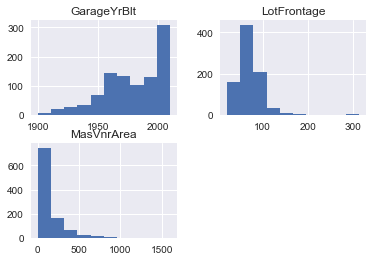

In [19]:
X_train[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].hist();

In [20]:
X_train[numeric_column_names] = X_train[numeric_column_names].fillna(0)

In [21]:
regressor.fit(X_train[numeric_column_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
regressor.score(X_train[numeric_column_names], y_train)

0.79812636653033964

[  94546.59021574  319548.4326495   140270.63909417  224453.01768405
  236313.23539591  164261.63064394   86677.32797051  254333.97137668
  219789.4704818   164997.99974479  145462.06507549  127947.51980141]


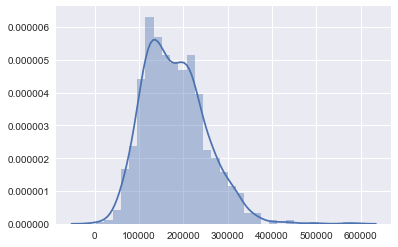

In [23]:
predictions = regressor.predict(X_train[numeric_column_names])
print(predictions[:12])
sns.distplot(predictions);

In [24]:
differences = (predictions - y_train).round(0)
print(differences[:12])

Id
128      7547.0
878    -30452.0
880      3771.0
163      4453.0
1181   -13687.0
         ...   
603     34334.0
728     25289.0
426     29998.0
778      2962.0
199     23948.0
Name: SalePrice, Length: 12, dtype: float64


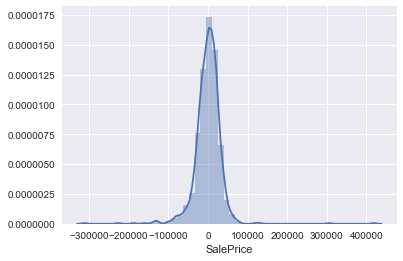

In [25]:
sns.distplot(differences);

In [26]:
1 - predictions / y_train

Id
128    -0.086742
878     0.087004
880    -0.027624
163    -0.020241
1181    0.054747
          ...   
1114   -0.025753
796    -0.112036
832    -0.006137
79      0.216790
57     -0.325502
Name: SalePrice, Length: 1022, dtype: float64

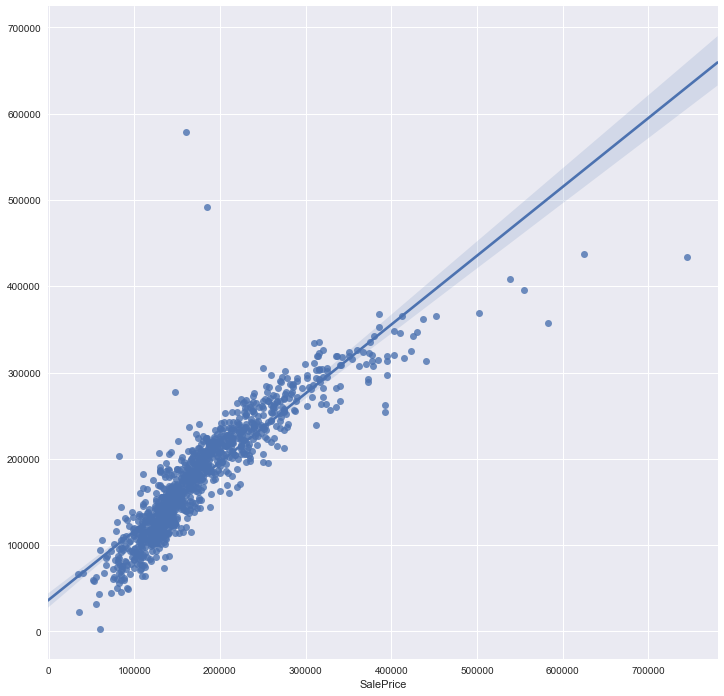

In [27]:
plt.figure(figsize=(12, 12))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()

In [28]:
X_test[numeric_column_names].isnull().sum().sort_values(ascending=False)[:4]

LotFrontage    88
GarageYrBlt    32
MasVnrArea      4
YrSold          0
dtype: int64

In [29]:
X_test[numeric_column_names] = X_test[numeric_column_names].fillna(0)

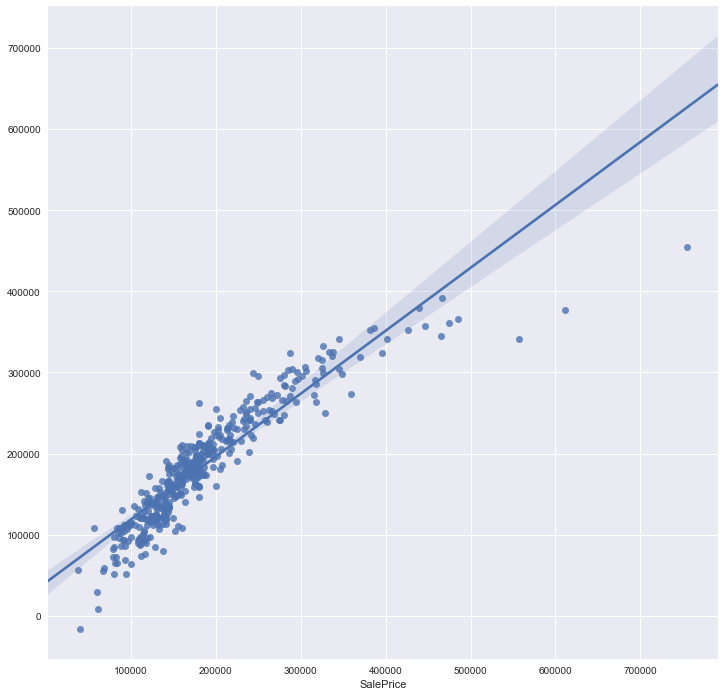

In [30]:
predictions_test = regressor.predict(X_test[numeric_column_names])
plt.figure(figsize=(12,12))
sns.regplot(y_test, predictions_test)
plt.grid(True)
plt.show()

In [31]:
print("score for test: ", regressor.score(X_test[numeric_column_names], y_test))

score for test:  0.841202121302


In [32]:
deviation = 1 - predictions_test / y_test
deviation[:12]

Id
479     0.018122
1129   -0.010815
385    -0.059755
1123    0.338558
1217   -0.359040
          ...   
19     -0.007233
245    -0.192125
813    -0.927298
1141    0.011083
483    -0.127019
Name: SalePrice, Length: 12, dtype: float64

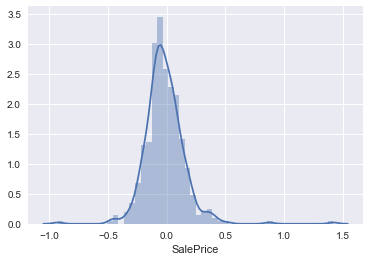

In [33]:
sns.distplot(deviation);

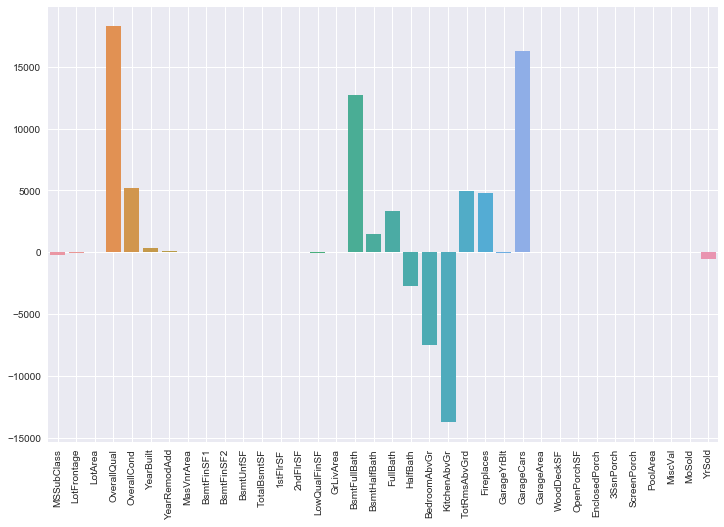

In [34]:
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=numeric_column_names, y=regressor.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(),rotation=90); plt.grid(True)

In [35]:
print(regressor.intercept_)
print(regressor.coef_)

55884.0271212
[ -1.74092382e+02  -1.59334956e+01   3.90604746e-01   1.82477174e+04
   5.21657989e+03   3.75326569e+02   1.36580705e+02   2.17291147e+01
   6.20814805e+00   7.67033158e-03  -6.04172068e-01   5.61164632e+00
   1.99827845e+01   2.17552995e+01  -2.43299134e+01   1.74081705e+01
   1.26936626e+04   1.50351700e+03   3.33729642e+03  -2.70834376e+03
  -7.47762034e+03  -1.36774474e+04   4.95468307e+03   4.80689715e+03
  -1.46397401e+01   1.62721482e+04   6.62093154e+00   3.00251352e+01
   3.95602564e+00   3.05792346e+01   4.55257238e+01   7.31855496e+01
  -6.40235362e+00  -2.58236600e+00   2.66355805e+01  -5.50741893e+02]


In [36]:
print(regressor.intercept_, " + ",)
list(zip(regressor.coef_, "*"*len(regressor.coef_), numeric_column_names))

55884.0271212  + 


[(-174.09238201321671, '*', 'MSSubClass'),
 (-15.933495614873367, '*', 'LotFrontage'),
 (0.39060474565883219, '*', 'LotArea'),
 (18247.717407530006, '*', 'OverallQual'),
 (5216.5798941699477, '*', 'OverallCond'),
 (375.32656942573919, '*', 'YearBuilt'),
 (136.58070545806873, '*', 'YearRemodAdd'),
 (21.729114669053502, '*', 'MasVnrArea'),
 (6.2081480507474822, '*', 'BsmtFinSF1'),
 (0.007670331581721257, '*', 'BsmtFinSF2'),
 (-0.60417206823868241, '*', 'BsmtUnfSF'),
 (5.6116463180987921, '*', 'TotalBsmtSF'),
 (19.982784461723895, '*', '1stFlrSF'),
 (21.755299480181293, '*', '2ndFlrSF'),
 (-24.329913406608881, '*', 'LowQualFinSF'),
 (17.408170535480167, '*', 'GrLivArea'),
 (12693.662631968271, '*', 'BsmtFullBath'),
 (1503.5170040007224, '*', 'BsmtHalfBath'),
 (3337.2964235029067, '*', 'FullBath'),
 (-2708.3437562696354, '*', 'HalfBath'),
 (-7477.6203421209902, '*', 'BedroomAbvGr'),
 (-13677.447367546691, '*', 'KitchenAbvGr'),
 (4954.6830722139412, '*', 'TotRmsAbvGrd'),
 (4806.897153734108

In [37]:
pd.options.display.max_rows = 12
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [38]:
categorical_columns = train.dtypes[train.dtypes == 'object'].index
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])

print("Learned classes:", le.classes_)
capitals_list = ["tokyo", "tokyo", "paris"]
print("transformed:", capitals_list, " to: ", le.transform(capitals_list))
print("inverse:", [2, 2, 1, 0], "to:", le.inverse_transform([2, 2, 1, 0]))

Learned classes: ['amsterdam' 'paris' 'tokyo']
transformed: ['tokyo', 'tokyo', 'paris']  to:  [2 2 1]
inverse: [2, 2, 1, 0] to: ['tokyo' 'tokyo' 'paris' 'amsterdam']


In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc.fit([[0, 0, 3],
         [1, 1, 0],
         [0, 2, 1],
         [1, 0, 2]])

print("Number of unique IDs for column:", enc.n_values)
print("Where does the feature start/end:", enc.feature_indices_)
print(enc.transform([[0, 1, 1]]).toarray())
print(enc.transform([[1, 2, 3]]).toarray())

Number of unique IDs for column: auto
Where does the feature start/end: [0 2 5 9]
[[ 1.  0.  0.  1.  0.  0.  1.  0.  0.]]
[[ 0.  1.  0.  0.  1.  0.  0.  0.  1.]]


In [59]:
train = train.fillna("None")
encoders = {col: LabelEncoder().fit(train[col]) for col in categorical_columns}

print(encoders['MSZoning'].classes_)
print(encoders['Street'].classes_)

['C (all)' 'FV' 'RH' 'RL' 'RM']
['Grvl' 'Pave']


In [60]:
def encode_categorical(data, columns, encoders):
  data = data.fillna("None")
  return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                      index = data.index)

train_encoded = encode_categorical(train, categorical_columns, encoders)

train_encoded.head(8)

Alley  BldgType  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
Id                                                                        
1       1         0         4             3             2             6   
2       1         0         4             1             0             6   
3       1         0         4             2             2             6   
4       1         0         1             3             0             6   
5       1         0         4             0             2             6   
6       1         0         4             3             2             6   
7       1         0         4             0             2             6   
8       1         0         4             2             0             1   

    BsmtQual  CentralAir  Condition1  Condition2  Electrical  ExterCond  \
Id                                                                        
1          2           1           2           2           5          4   
2          2           1           1           2           5          4   
3          2           1           2           2           5          4   
4          4           1           2           2           5          4   
5          2           1           2           2           5          4   
6          2           1           2           2           5          4   
7          0           1           2           2           5          4   
8          2           1           4           2           5          4   

    ExterQual  Exterior1st  Exterior2nd  Fence  FireplaceQu  Foundation  \
Id                                                                        
1           2           12           13      4            3           2   
2           3            8            8      4            5           1   
3           2           12           13      4            5           2   
4           3           13           15      4            2           0   
5           2           12           13      4            5           2   
6           3           12           13      2            3           5   
7           2           12           13      4            2           2   
8           3            6            6      4            5           1   

      ...      HouseStyle  KitchenQual  LandContour  LandSlope  LotConfig  \
Id    ...                                                                   
1     ...               5            2            3          0          4   
2     ...               2            3            3          0          2   
3     ...               5            2            3          0          4   
4     ...               5            2            3          0          0   
5     ...               5            2            3          0          2   
6     ...               0            3            3          0          4   
7     ...               2            2            3          0          4   
8     ...               5            3            3          0          0   

    LotShape  MSZoning  MasVnrType  MiscFeature  Neighborhood  PavedDrive  \
Id                                                                          
1          3         3           1            1             5           2   
2          3         3           2            1            24           2   
3          0         3           1            1             5           2   
4          0         3           2            1             6           2   
5          0         3           1            1            15           2   
6          0         3           2            3            11           2   
7          3         3           3            1            21           2   
8          0         3           3            3            14           2   

    PoolQC  RoofMatl  RoofStyle  SaleCondition  SaleType  Street  Utilities  
Id                                                                           
1        3         1          1              4       

In [43]:
one_hot_encoder = OneHotEncoder().fit(train_encoded)

print(one_hot_encoder.transform(train_encoded[:10]).todense())
print(one_hot_encoder.transform(train_encoded).shape)

[[ 1.  0.  0. ...,  1.  1.  0.]
 [ 1.  0.  0. ...,  1.  1.  0.]
 [ 1.  0.  0. ...,  1.  1.  0.]
 ..., 
 [ 1.  0.  0. ...,  1.  1.  0.]
 [ 1.  0.  0. ...,  1.  1.  0.]
 [ 1.  0.  0. ...,  1.  1.  0.]]
(1460, 268)


In [44]:
one_hot_X_train = one_hot_encoder.transform(encode_categorical(X_train[categorical_columns], categorical_columns, encoders))

cat_regression = LinearRegression().fit(one_hot_X_train, y_train)
print(cat_regression.score(one_hot_X_train, y_train))

one_hot_X_test = one_hot_encoder.transform(encode_categorical(X_test[categorical_columns], categorical_columns, encoders))
print(cat_regression.score(one_hot_X_test, y_test))

0.877046842196
0.743049969906


In [45]:
X_train[numeric_column_names].shape, one_hot_X_train.shape

((1022, 36), (1022, 268))

In [46]:
new_X_train = pd.np.concatenate([one_hot_X_train.todense(), X_train[numeric_column_names]], axis=1)
new_X_test = pd.np.concatenate([one_hot_X_test.todense(), X_test[numeric_column_names]], axis=1)
print(new_X_train.shape, new_X_test.shape)

(1022, 304) (438, 304)


In [47]:
all_data_lr = LinearRegression().fit(new_X_train, y_train)
print(all_data_lr.score(new_X_train, y_train))
print(all_data_lr.score(new_X_test, y_test))

0.937477374809
-93663197026.5


In [48]:
from sklearn.linear_model import Ridge

alpha = [0.01, 0.1, 10, 100, 150, 200]

for a in alpha:
  all_data_lr = Ridge(alpha=a).fit(new_X_train, y_train)
  print('alpha:', a)
  print(all_data_lr.score(new_X_train, y_train), all_data_lr.score(new_X_test, y_test))
  print()

alpha: 0.01
0.937460717713 0.848821474014

alpha: 0.1
0.936445464242 0.859628242827

alpha: 10
0.893310713513 0.892240478482

alpha: 100
0.852442428875 0.882169210027

alpha: 150
0.8433690377 0.876782688123

alpha: 200
0.836736666039 0.872436100326



In [49]:
from sklearn.linear_model import Lasso

alpha = [150, 160, 170, 180]

for a in alpha:
  all_data_lr = Lasso(alpha=a).fit(new_X_train, y_train)
  print('alpha:', a)
  print(all_data_lr.score(new_X_train, y_train), all_data_lr.score(new_X_test, y_test))
  print()

alpha: 150
0.909334885755 0.901150085494

alpha: 160
0.907068635833 0.901228410988

alpha: 170
0.904786689939 0.901209025411

alpha: 180
0.90249766885 0.901108877848



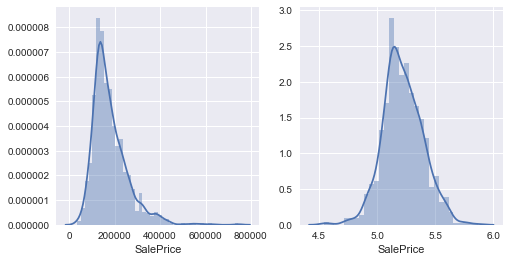

In [50]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot(y_train);
plt.subplot(1, 2, 2)
sns.distplot(pd.np.log10(y_train));

In [51]:
all_data_lr = LinearRegression().fit(new_X_train, pd.np.log10(y_train))
print(all_data_lr.score(new_X_train, pd.np.log10(y_train)))
print(all_data_lr.score(new_X_test, pd.np.log10(y_test)))

0.944010287801
-39828977095.0


In [52]:
alpha = [0.01, 0.1, 10, 100, 110, 150, 200]
for a in alpha:
  all_data_lr = Ridge(alpha=a).fit(new_X_train, pd.np.log10(y_train))
  print('alpha:', a)
  print(all_data_lr.score(new_X_train, pd.np.log10(y_train)), all_data_lr.score(new_X_test, pd.np.log10(y_test)))

alpha: 0.01
0.943997501252 0.898373694962
alpha: 0.1
0.943229831719 0.905995893636
alpha: 10
0.914572813642 0.925776887973
alpha: 100
0.885671673021 0.922058006344
alpha: 110
0.884183417383 0.92151272179
alpha: 150
0.879165428615 0.919540096365
alpha: 200
0.874255967213 0.917443704404


In [53]:
alpha = [0.00009, 0.0001, 0.0005, 0.001, 0.01, 0.1]

for a in alpha:
  all_data_lr = Lasso(alpha=a).fit(new_X_train, pd.np.log10(y_train))
  print('alpha:', a)
  print(all_data_lr.score(new_X_train, pd.np.log10(y_train)), all_data_lr.score(new_X_test, pd.np.log10(y_test)))

alpha: 9e-05
0.936066919611 0.931545965281
alpha: 0.0001
0.935155038998 0.93263395996
alpha: 0.0005
0.900603513558 0.930621601743
alpha: 0.001
0.874029705109 0.920097662827
alpha: 0.01
0.826421467197 0.896092370014
alpha: 0.1
0.771138355465 0.853062381872


In [54]:
from sklearn.metrics import r2_score

for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
  all_data_lr = Ridge(alpha=alpha).fit(new_X_train, pd.np.log10(y_train))
  print('alpha:', alpha)
  print(r2_score(10**all_data_lr.predict(new_X_train), y_train))
  print(r2_score(10**all_data_lr.predict(new_X_test), y_test))

alpha: 0.001
0.944242823349
0.919879031099
alpha: 0.01
0.944147892685
0.920031051823
alpha: 0.1
0.942541628143
0.920527643354
alpha: 1
0.926086094333
0.917329215283
alpha: 10
0.879718307165
0.914859971683
alpha: 100
0.781803737598
0.891525074439


In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)

poly_features.fit(new_X_train)

poly_X_trian = poly_features.transform(new_X_train)
poly_X_test = poly_features.transform(new_X_test)

print(poly_X_trian.shape)
print(poly_X_test.shape)

(1022, 46665)
(438, 46665)


In [56]:
for a in [10e6, 10e7, 10e8, 10e9, 10e10]:
  print('alpha:', a)
  all_data_lr = Ridge(alpha=a).fit(poly_X_trian, pd.np.log10(y_train))
  print(all_data_lr.score(poly_X_trian, pd.np.log10(y_train)), all_data_lr.score(poly_X_test, pd.np.log10(y_test)))

alpha: 10000000.0
0.98782816837 -0.845894222786
alpha: 100000000.0
0.974980327289 0.556673709311
alpha: 1000000000.0
0.960607069477 0.828564296307
alpha: 10000000000.0
0.940967858355 0.537021146169
alpha: 100000000000.0
0.911468362915 0.518662395467


In [151]:
train = pd.read_csv('data/house-prices/train.csv', index_col=['Id'])
test = pd.read_csv('data/house-prices/test.csv', index_col=['Id'])

def pipeline_data(data):
  # log of several features with long tail distributions / normalization
  data['GrLivArea'] = np.log(data['GrLivArea'])
  data['GrLivArea'] = np.log(data['GrLivArea'])

  _numeric = data[numeric_column_names].fillna(0)
  _categorical = data[categorical_columns].fillna("None")
  _encoded = encode_categorical(_categorical, categorical_columns, encoders)
  _one_hot_encoded = one_hot_encoder.transform(_encoded)
  _merged = pd.np.concatenate([_one_hot_encoded.todense(), _numeric], axis=1)
  return _merged

In [112]:
# add TotalSF feature
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

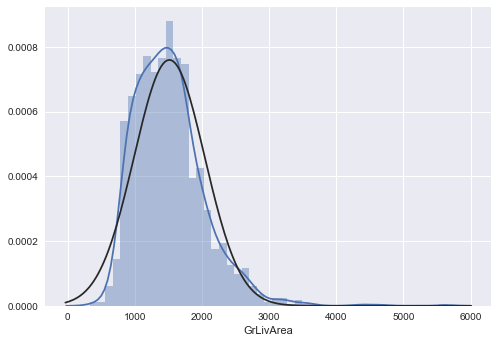

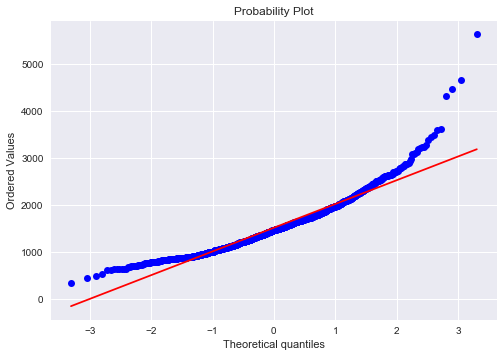

In [118]:
# histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [123]:
# create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

test['HasBsmt'] = pd.Series(len(test['TotalBsmtSF']), index=test.index)
test['HasBsmt'] = 0 
test.loc[test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [124]:
# log of several features with long tail distributions / normalization
train['GrLivArea'] = np.log(train['GrLivArea'])
test['GrLivArea'] = np.log(test['GrLivArea'])

train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
test.loc[test['HasBsmt']==1,'TotalBsmtSF'] = np.log(test['TotalBsmtSF'])

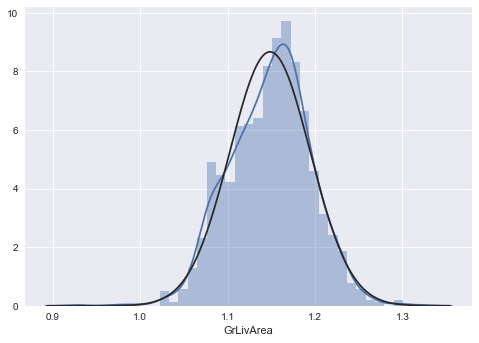

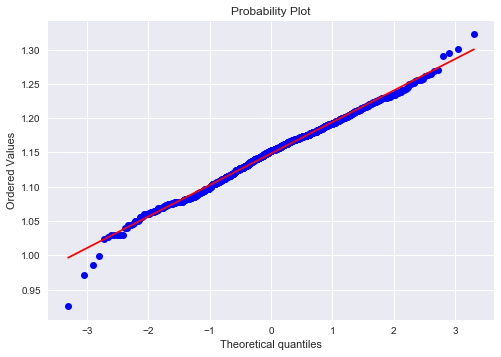

In [126]:
# transformed histogram and normal probability plot of GrLivArea
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

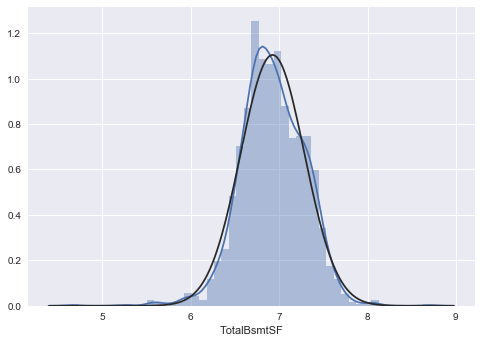

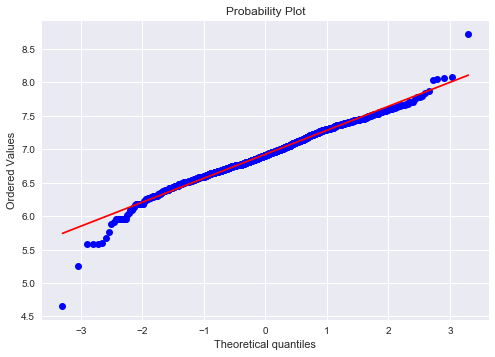

In [125]:
# histogram and normal probability plot of TotalBsmtSF
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


In [152]:
X_full = pipeline_data(train)
y_full = train['SalePrice']

# Fix test and set missing data problems
test['MSZoning'].fillna('RL', inplace=True)
test['Utilities'].fillna('AllPub', inplace=True)
test['Exterior1st'].fillna('VinylSd', inplace=True)
test['Exterior2nd'].fillna('VinylSd', inplace=True)
test['KitchenQual'].fillna('TA', inplace=True)
test['Functional'].fillna('Typ', inplace=True)
test['SaleType'].fillna('WD', inplace=True)

test_set = pipeline_data(test)

In [156]:
# Lucho's initial result
ridge = Ridge(alpha=0.1).fit(X_full, pd.np.log10(y_full))

predictions = 10**ridge.predict(test_set)
predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})
predictions_df.to_csv("submit_me.csv", index=False)
predictions_df.head()

Id      SalePrice
0  1461  118631.242132
1  1462  156978.534491
2  1463  181364.463316
3  1464  200420.166478
4  1465  196403.021758

In [157]:
# Second try: mean_squared_error of log of prediction and log of real value as metric
from sklearn.metrics import mean_squared_error
from math import sqrt

for alpha in [10, 11, 12, 13, 14, 15, 17, 60, 80, 100]:
  all_data_lr = Ridge(alpha=alpha).fit(new_X_train, pd.np.log10(y_train))
  print('alpha:', alpha)
  print(sqrt(mean_squared_error(all_data_lr.predict(new_X_train), pd.np.log10(y_train))))
  print(sqrt(mean_squared_error(all_data_lr.predict(new_X_test), pd.np.log10(y_test))))
  
# # best result
# alpha: 17
# 0.052197789780048166
# 0.04730858503165042

alpha: 10
0.05056279051867666
0.04750276240645483
alpha: 11
0.05085008560679126
0.047453299289841495
alpha: 12
0.051114673162073056
0.04741326547845774
alpha: 13
0.05136009419212796
0.04738104068484081
alpha: 14
0.05158911471817891
0.047355365584602786
alpha: 15
0.05180393655267712
0.047335242390014035
alpha: 17
0.052197789780048166
0.04730858503165042
alpha: 60
0.05652896074860945
0.04792433890527171
alpha: 80
0.057620865845448566
0.04831506576958949
alpha: 100
0.05849380960071709
0.04867825944723197


In [158]:
# Using alpha based on root of mean_squared_error of log of prediction and log of real value
ridge = Ridge(alpha=17).fit(X_full, pd.np.log10(y_full))

predictions = 10**ridge.predict(test_set)
predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})
predictions_df.to_csv("submit_me.csv", index=False)
predictions_df.head()

Id      SalePrice
0  1461  112962.650810
1  1462  145995.196788
2  1463  169900.607589
3  1464  194417.049093
4  1465  193670.964198

In [159]:
# Third try: mean_squared_error of the log of the predicted price and log of real price as metric and Lasso
for alpha in [0.00025, 0.00026, 0.0001, 0.00022, 0.00023, 0.00024, 0.0002, 0.001, 0.00021]:
  all_data_lr = Lasso(alpha=alpha).fit(new_X_train, pd.np.log10(y_train))
  print('alpha:', alpha)
  print(sqrt(mean_squared_error(all_data_lr.predict(new_X_train), pd.np.log10(y_train))))
  print(sqrt(mean_squared_error(all_data_lr.predict(new_X_test), pd.np.log10(y_test))))
  
# # best result
# alpha: 0.00024
# 0.047617350865843504
# 0.04409807975736432

alpha: 0.00025
0.04786890833202469
0.044099345191571514
alpha: 0.00026
0.04811710620870584
0.044110766589983245
alpha: 0.0001
0.044052554756575844
0.045255336188199644
alpha: 0.00022
0.04709420153482265
0.04411824371369573
alpha: 0.00023
0.04735359653743857
0.044106549900497546
alpha: 0.00024
0.047617350865843504
0.04409807975736432
alpha: 0.0002
0.04658216435652388
0.04414051367898176
alpha: 0.001
0.06139981406660375
0.04928661902320809
alpha: 0.00021
0.04683758100390856
0.04413086302487055


In [160]:
# Using alpha based on root of mean_squared_error of the log of the predicted price and log of real price and Lasso with alpha: 0.0001
lasso = Lasso(alpha=0.00024).fit(X_full, pd.np.log10(y_full))

predictions = 10**lasso.predict(test_set)
predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})
predictions_df.to_csv("submit_me.csv", index=False)
predictions_df.head()

Id      SalePrice
0  1461  117329.990795
1  1462  142374.743468
2  1463  173601.439605
3  1464  199949.614050
4  1465  195598.183100

In [161]:
# Use predictions from both lasso and ridge with log of rmse
predictions = ((10**lasso.predict(test_set)) + (10**ridge.predict(test_set)))/2
predictions_df = pd.DataFrame({"Id":test.index, "SalePrice":predictions})
predictions_df.to_csv("submit_me.csv", index=False)
predictions_df.head()

Id      SalePrice
0  1461  115146.320802
1  1462  144184.970128
2  1463  171751.023597
3  1464  197183.331571
4  1465  194634.573649

In [135]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=4330).fit(new_X_train, y_train)

print(sqrt(mean_squared_error(rf.predict(new_X_train), y_train)))
print(sqrt(mean_squared_error(rf.predict(new_X_test), y_test)))

17295.138831363693
27081.410908708243


In [136]:
# rf.feature_importances_

In [137]:
import numpy as np

print(len(lasso.coef_))
np.count_nonzero(lasso.coef_)

304


109

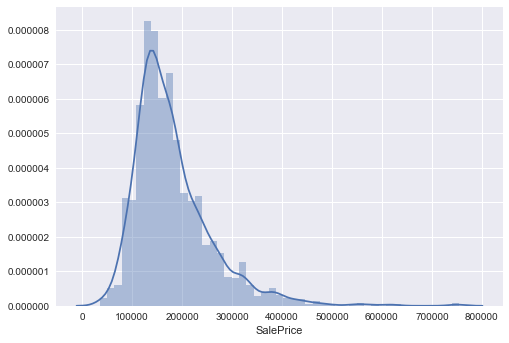

In [138]:
df_train = train
sns.distplot(df_train['SalePrice']);

In [139]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [140]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


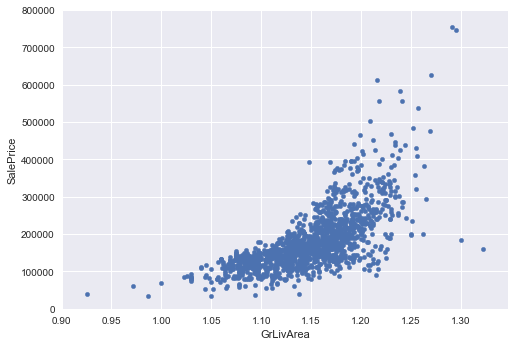

In [141]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

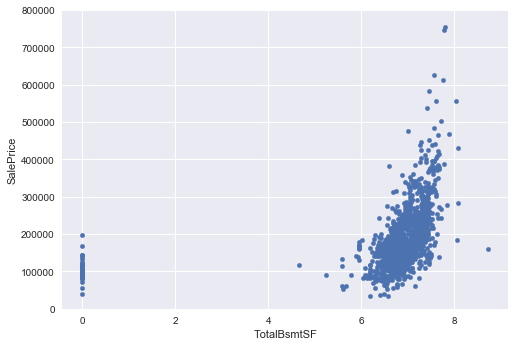

In [142]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

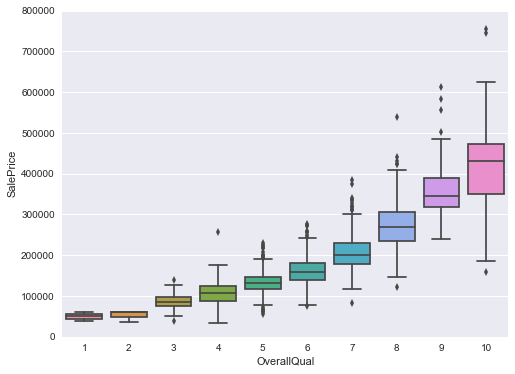

In [143]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

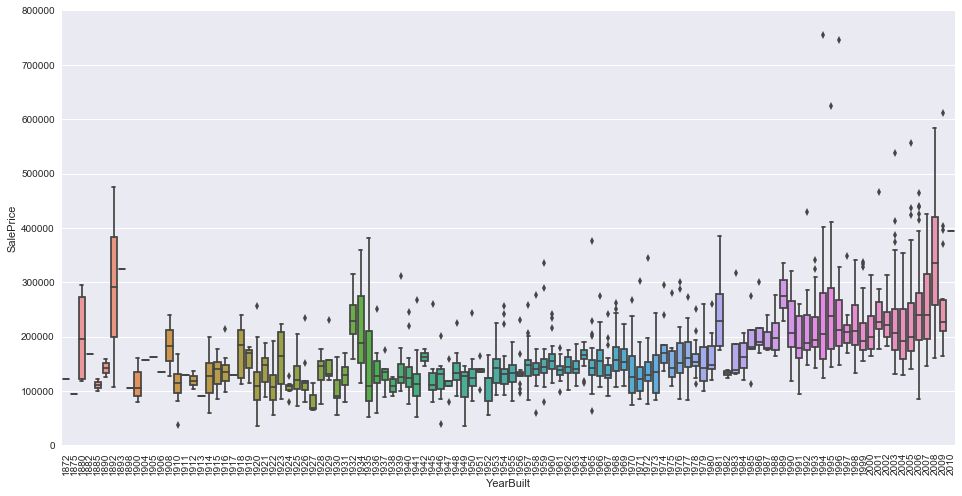

In [144]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

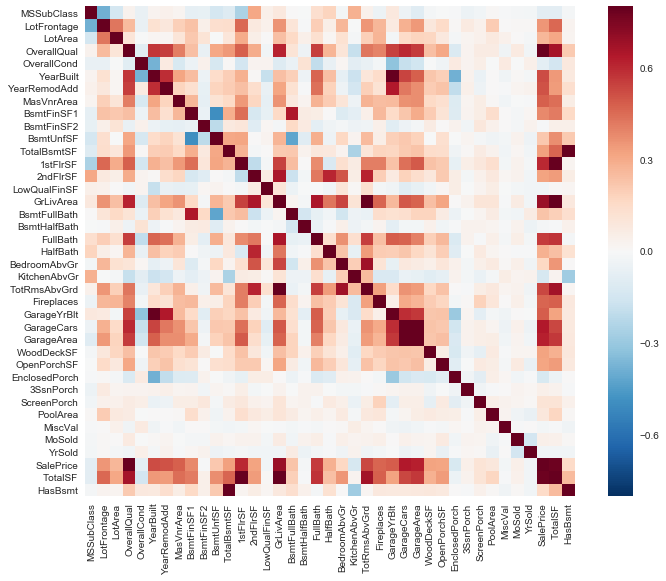

In [145]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [146]:
df_train = train.drop(labels=['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt'], axis=1)

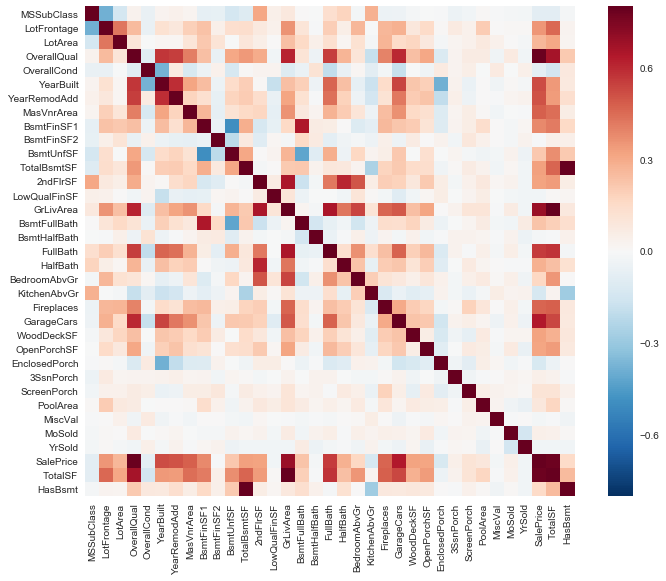

In [147]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True);

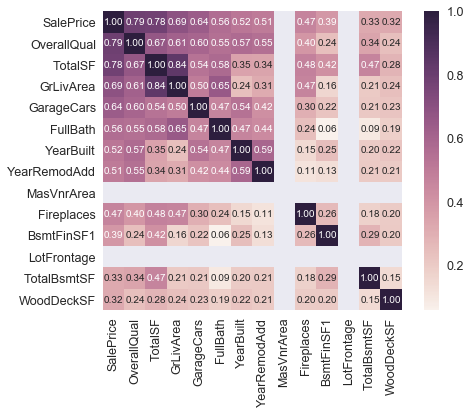

In [148]:
k = 14
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

KeyboardInterrupt: 

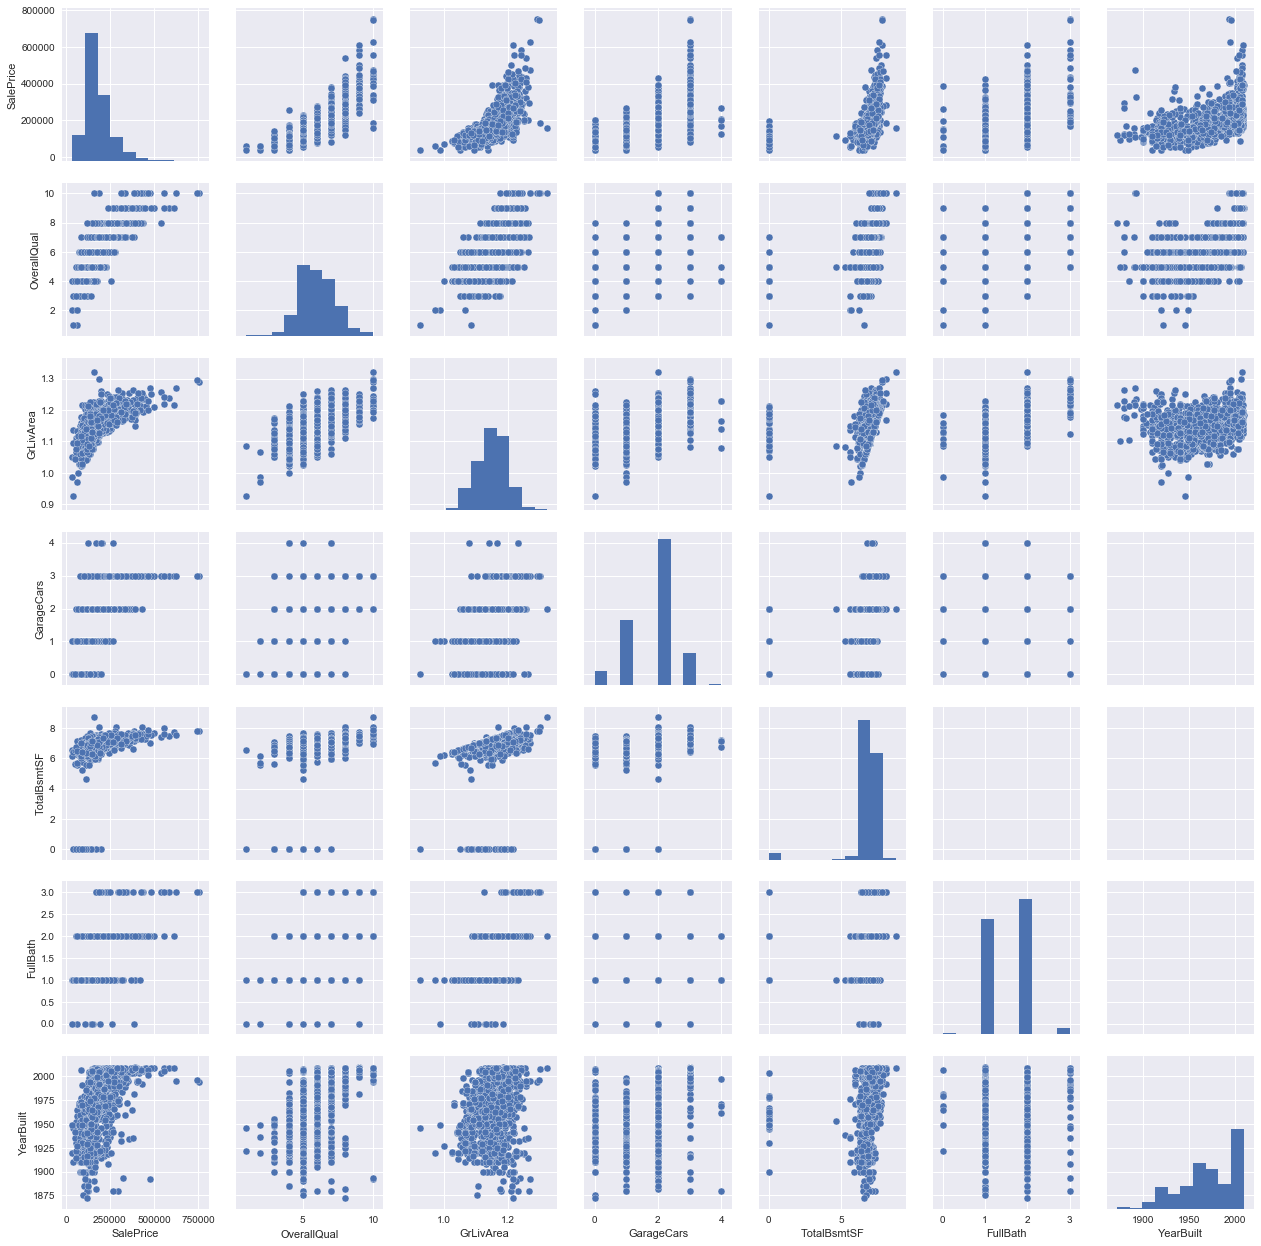

In [149]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show();

In [ ]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


In [ ]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]


In [ ]:
# Fourth time's a charm

In [ ]:
# not missing data but no fense and no fireplace?
df_train.Fence.unique()
df_train.FireplaceQu.unique()